# A look into the San Francisco AirBnBs listings

## 1. Business Understanding
   
We'll like to undertand a few aspect of the airbnbs listed in San Francisco. Some of the questions we are interested in answering are as listed below. 
   > - Which neighborhoods have the highest rating scores?
   > - Which are the most common property types in San Francisco?
   > - What factors affect the listings prices in San Francisco?


## 2. Data Understanding
   
   > Here we'll look into the characteristics of our dataset.

In [1]:
#imorting libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

### Gather data

In [2]:
#reading the .csv data
SF_Data = pd.read_csv("San_Francisco_listings.csv")

### Assess data

In [3]:
# A function that return the characteristics of the dataset
def dataset_summary(dataset):
    """
    Summarizes the dataset by providing information about its shape, columns, first 5 lines, data types, and missing values.

    Parameters:
    dataset (DataFrame): The dataset to be summarized.

    Returns:
    tuple: A tuple containing the shape of the dataset, columns in the dataset, first 5 lines of the dataset, data types of columns, and missing values.
    """
    
    # Shape of the dataset
    shape = dataset.shape
    print("The shape of the dataset is:", shape)
    print("\n")
    
    # Columns in the dataset
    columns = dataset.columns.tolist()
    print("The columns in the dataset are:", columns)
    print("\n")
    
    # First 5 lines of the dataset
    first_5_lines = dataset.head()
    print("These are the first 5 lines of the dataset:\n", first_5_lines)
    print("\n")
    
    # Data types of columns
    data_types = dataset.dtypes
    print("The data types of columns are as follows:\n", data_types)
    print("\n")
    
    # Missing values
    missing_values = dataset.isnull().sum()
    print("Missing values:\n", missing_values)
    print("\n")

    return shape, columns, first_5_lines, data_types, missing_values

# Print the summary of the dataset
summary = dataset_summary(SF_Data)

The shape of the dataset is: (8056, 75)


The columns in the dataset are: ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availabi

### Exploration plots

#### Q1. Which neighborhoods have the highest rating scores?

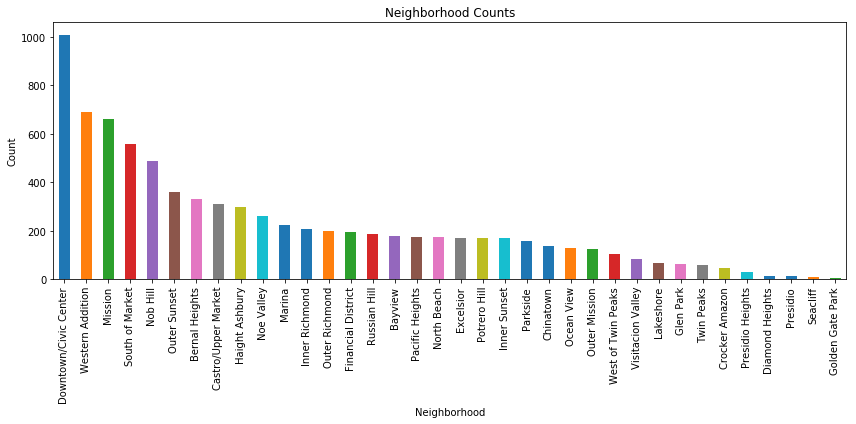

In [4]:
# Count the occurrences of each neighborhood
neighborhood_counts = SF_Data['neighbourhood_cleansed'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
neighborhood_counts.plot(kind='bar')
plt.title('Neighborhood Counts')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.tight_layout()  # Adjust spacing to prevent label overlap
plt.show()

> The above plot shows that Downtown/Civic Center neighborhood has the most AirBnBs in San Fransisco. 

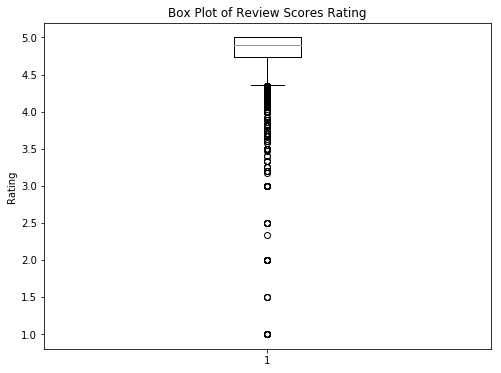

In [5]:
# Box plot of rating scores
# Create a box plot of review_scores_rating
plt.figure(figsize=(8, 6))
plt.boxplot(SF_Data['review_scores_rating'].dropna())
plt.title('Box Plot of Review Scores Rating')
plt.ylabel('Rating')
plt.show()

> The box plot of review scores rating shows a number of outliers. It also shows that the median rating is about 4.9.

#### Q2.Which are the most common property types in San Francisco?

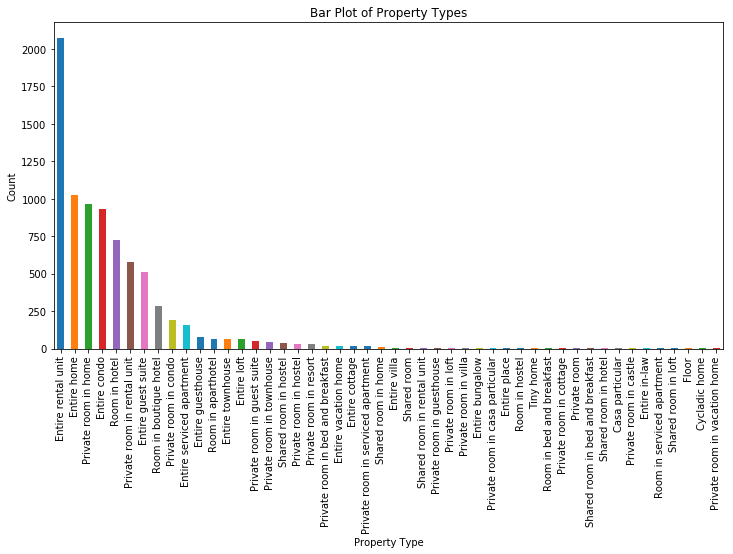

In [6]:
# Bar plot of property_type

# Count the occurrences of each property type
property_counts = SF_Data['property_type'].value_counts()

# Create a bar plot of property types
plt.figure(figsize=(12, 6))
property_counts.plot(kind='bar')
plt.title('Bar Plot of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

> The most common property type of AirBnB listing in San Francisco is entire rental unit.  

#### Q3. What factors affect the listings prices in San Francisco?

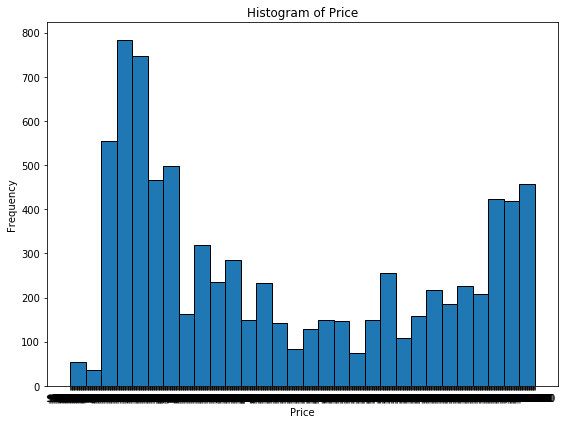

In [7]:
# Histogram of price

# Create a histogram of price
plt.figure(figsize=(8, 6))
plt.hist(SF_Data['price'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()  # Adjust the layout to prevent label overlap
plt.show()

> The above plot shows the disribution of listings' prices. 

## 3. Data Preparation

Following the undestanding of here data is cleaned. Missing values are handled, incorrect datatypes are corrected and the messy column values are tidied. 

### Clean Data

In [8]:
# make a copy of clean dataset
SF_Data_clean = SF_Data.copy()

In [9]:
# 1.Delete columns with 100% percent missing values

# Drop columns with 100% missing values
SF_Data_clean = SF_Data_clean.dropna(axis=1, how='all')

In [10]:
# Remove $ and , from columns with currency

# Remove $ and , from columns with currency
SF_Data_clean['price'] = SF_Data_clean['price'].str.replace('$', '').str.replace(',', '')

In [11]:
# Transform column price to be of float dtype

# Transform the 'price' column to float dtype
SF_Data_clean['price'] = SF_Data_clean['price'].astype(float)

In [12]:
#  function that transforms columns with 't' and 'f' values to boolean dtype

def transform_columns_to_boolean(df, columns):
    """
    Transforms columns with 't' and 'f' values to boolean dtype in a DataFrame.

    Parameters:
    - df (pandas DataFrame): The DataFrame containing the columns to transform.
    - columns (list): A list of column names to transform.

    Returns:
    - df (pandas DataFrame): The DataFrame with the transformed columns.

    Example:
    transform_columns_to_boolean(SF_Data, ['col1', 'col2', 'col3'])
    """
    for column in columns:
        df[column] = df[column].replace({'t': True, 'f': False}).astype(bool)
    return df


In [13]:
# transform_columns_to_boolean 
transform_columns_to_boolean(SF_Data_clean, ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable'])

,id,listing_url,scrape_id,last_scraped,source,name,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,138592,https://www.airbnb.com/rooms/138592,20231204023824,2023-12-04,city scrape,Home in San Francisco · ★4.91 · 4 bedrooms · 4...,The home is walking distance from lots of loca...,https://a0.muscache.com/pictures/039b1662-ff1a...,648553,https://www.airbnb.com/users/show/648553,...,4.91,5.00,4.55,Pending Application,False,1,1,0,0,0.23
1,474107,https://www.airbnb.com/rooms/474107,20231204023824,2023-12-04,city scrape,Home in San Francisco · ★4.91 · 2 bedrooms · 2...,Excelsior is south of the Mission district and...,https://a0.muscache.com/pictures/181cbeb0-18b7...,2318089,https://www.airbnb.com/users/show/2318089,...,4.99,4.76,4.87,STR-0007772,False,1,0,1,0,1.92
2,487019,https://www.airbnb.com/rooms/487019,20231204023824,2023-12-04,city scrape,Rental unit in San Francisco · ★4.53 · 3 bedro...,A gourmet hidden gem with spectacular views of...,https://a0.muscache.com/pictures/5789289/7a78c...,2410550,https://www.airbnb.com/users/show/2410550,...,4.72,4.36,4.47,STR-0001599,False,1,1,0,0,0.26
3,487499,https://www.airbnb.com/rooms/487499,20231204023824,2023-12-04,city scrape,Rental unit in San Francisco · ★4.78 · 1 bedro...,The Mission Dolores area is consider one of th...,https://a0.muscache.com/pictures/12842308/68a6...,1682183,https://www.airbnb.com/users/show/1682183,...,4.92,4.85,4.60,NaN,False,1,1,0,0,1.41
4,1163946,https://www.airbnb.com/rooms/1163946,20231204023824,2023-12-04,previous scrape,Condo in San Francisco · 2 bedrooms · 2 beds ·...,the Mission is a simmering cauldron of culture...,https://a0.muscache.com/pictures/miso/Hosting-...,1918239,https://www.airbnb.com/users/show/1918239,...,5.00,4.50,4.50,NaN,False,1,1,0,0,0.02
5,1174701,https://www.airbnb.com/rooms/1174701,20231204023824,2023-12-04,city scrape,Rental unit in San Francisco · 1 bedroom · 1 b...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,6429436,https://www.airbnb.com/users/show/6429436,...,5.00,5.00,5.00,Exempt,False,9,9,0,0,0.21
6,1178260,https://www.airbnb.com/rooms/1178260,20231204023824,2023-12-04,city scrape,Rental unit in San Francisco · ★4.94 · 2 bedro...,NaN,https://a0.muscache.com/pictures/1dc8ed18-5afd...,6446722,https://www.airbnb.com/users/show/6446722,...,4.97,4.91,4.80,NaN,False,1,1,0,0,0.96
7,1195173,https://www.airbnb.com/rooms/1195173,20231204023824,2023-12-04,city scrape,Rental unit in San Francisco · ★4.93 · 1 bedro...,Nobhill- 1 block away from Grace Cathedral,https://a0.muscache.com/pictures/d4ab7c9f-bdf3...,6531356,https://www.airbnb.com/users/show/6531356,...,4.96,5.00,4.86,NaN,False,1,0,1,0,0.22
8,1550913,https://www.airbnb.com/rooms/1550913,20231204023824,2023-12-04,city scrape,Guest suite in San Francisco · ★4.87 · 1 bedro...,NaN,https://a0.muscache.com/pictures/24474471/5740...,497158,https://www.airbnb.com/users/show/497158,...,4.93,4.90,4.77,STR-0000051,False,1,1,0,0,1.88
9,1574848,https://www.airbnb.com/rooms/1574848,20231204023824,2023-12-04,city scrape,Rental unit in San Francisco · ★4.70 · 1 bedro...,Telegraph hill. 3 blocks from North Beach . gr...,https://a0.muscache.com/pictures/22919328/4bc4...,4106299,https://www.airbnb.com/users/show/4106299,...,4.83,4.83,4.61,1082059,False,3,2,1,0,0.21


In [14]:
# function that transforms columns in a DataFrame into the category data type

def transform_columns_to_category(df, columns):
    """
    Transforms columns in a DataFrame into the category data type.

    Parameters:
    - df (pandas DataFrame): The DataFrame containing the columns to transform.
    - columns (list): A list of column names to transform.

    Returns:
    - df (pandas DataFrame): The DataFrame with the transformed columns.

    Example:
    transform_columns_to_category(SF_Data, ['col1', 'col2', 'col3'])
    """
    for column in columns:
        df[column] = df[column].astype('category')
    return df

In [15]:
# transforms columns in a DataFrame into the category data type
transform_columns_to_category(SF_Data_clean, ['host_location', 'host_response_time', 'host_neighbourhood', 'host_verifications', 'neighbourhood', 'neighbourhood_cleansed', 'property_type', 'room_type'])

,id,listing_url,scrape_id,last_scraped,source,name,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,138592,https://www.airbnb.com/rooms/138592,20231204023824,2023-12-04,city scrape,Home in San Francisco · ★4.91 · 4 bedrooms · 4...,The home is walking distance from lots of loca...,https://a0.muscache.com/pictures/039b1662-ff1a...,648553,https://www.airbnb.com/users/show/648553,...,4.91,5.00,4.55,Pending Application,False,1,1,0,0,0.23
1,474107,https://www.airbnb.com/rooms/474107,20231204023824,2023-12-04,city scrape,Home in San Francisco · ★4.91 · 2 bedrooms · 2...,Excelsior is south of the Mission district and...,https://a0.muscache.com/pictures/181cbeb0-18b7...,2318089,https://www.airbnb.com/users/show/2318089,...,4.99,4.76,4.87,STR-0007772,False,1,0,1,0,1.92
2,487019,https://www.airbnb.com/rooms/487019,20231204023824,2023-12-04,city scrape,Rental unit in San Francisco · ★4.53 · 3 bedro...,A gourmet hidden gem with spectacular views of...,https://a0.muscache.com/pictures/5789289/7a78c...,2410550,https://www.airbnb.com/users/show/2410550,...,4.72,4.36,4.47,STR-0001599,False,1,1,0,0,0.26
3,487499,https://www.airbnb.com/rooms/487499,20231204023824,2023-12-04,city scrape,Rental unit in San Francisco · ★4.78 · 1 bedro...,The Mission Dolores area is consider one of th...,https://a0.muscache.com/pictures/12842308/68a6...,1682183,https://www.airbnb.com/users/show/1682183,...,4.92,4.85,4.60,NaN,False,1,1,0,0,1.41
4,1163946,https://www.airbnb.com/rooms/1163946,20231204023824,2023-12-04,previous scrape,Condo in San Francisco · 2 bedrooms · 2 beds ·...,the Mission is a simmering cauldron of culture...,https://a0.muscache.com/pictures/miso/Hosting-...,1918239,https://www.airbnb.com/users/show/1918239,...,5.00,4.50,4.50,NaN,False,1,1,0,0,0.02
5,1174701,https://www.airbnb.com/rooms/1174701,20231204023824,2023-12-04,city scrape,Rental unit in San Francisco · 1 bedroom · 1 b...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,6429436,https://www.airbnb.com/users/show/6429436,...,5.00,5.00,5.00,Exempt,False,9,9,0,0,0.21
6,1178260,https://www.airbnb.com/rooms/1178260,20231204023824,2023-12-04,city scrape,Rental unit in San Francisco · ★4.94 · 2 bedro...,NaN,https://a0.muscache.com/pictures/1dc8ed18-5afd...,6446722,https://www.airbnb.com/users/show/6446722,...,4.97,4.91,4.80,NaN,False,1,1,0,0,0.96
7,1195173,https://www.airbnb.com/rooms/1195173,20231204023824,2023-12-04,city scrape,Rental unit in San Francisco · ★4.93 · 1 bedro...,Nobhill- 1 block away from Grace Cathedral,https://a0.muscache.com/pictures/d4ab7c9f-bdf3...,6531356,https://www.airbnb.com/users/show/6531356,...,4.96,5.00,4.86,NaN,False,1,0,1,0,0.22
8,1550913,https://www.airbnb.com/rooms/1550913,20231204023824,2023-12-04,city scrape,Guest suite in San Francisco · ★4.87 · 1 bedro...,NaN,https://a0.muscache.com/pictures/24474471/5740...,497158,https://www.airbnb.com/users/show/497158,...,4.93,4.90,4.77,STR-0000051,False,1,1,0,0,1.88
9,1574848,https://www.airbnb.com/rooms/1574848,20231204023824,2023-12-04,city scrape,Rental unit in San Francisco · ★4.70 · 1 bedro...,Telegraph hill. 3 blocks from North Beach . gr...,https://a0.muscache.com/pictures/22919328/4bc4...,4106299,https://www.airbnb.com/users/show/4106299,...,4.83,4.83,4.61,1082059,False,3,2,1,0,0.21


In [16]:
# function that transforms columns in a DataFrame into the datetime data type

def transform_columns_to_datetime(df, columns):
    """
    Transforms columns in a DataFrame into the datetime data type.

    Parameters:
    - df (pandas DataFrame): The DataFrame containing the columns to transform.
    - columns (list): A list of column names to transform.

    Returns:
    - df (pandas DataFrame): The DataFrame with the transformed columns.

    Example:
    transform_columns_to_datetime(SF_Data, ['date1', 'date2', 'date3'])
    """
    for column in columns:
        df[column] = pd.to_datetime(df[column])
    return df

In [17]:
# transform_columns_to_datetime
transform_columns_to_datetime(SF_Data_clean, ['host_since', 'calendar_last_scraped', 'first_review', 'last_review'])

,id,listing_url,scrape_id,last_scraped,source,name,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,138592,https://www.airbnb.com/rooms/138592,20231204023824,2023-12-04,city scrape,Home in San Francisco · ★4.91 · 4 bedrooms · 4...,The home is walking distance from lots of loca...,https://a0.muscache.com/pictures/039b1662-ff1a...,648553,https://www.airbnb.com/users/show/648553,...,4.91,5.00,4.55,Pending Application,False,1,1,0,0,0.23
1,474107,https://www.airbnb.com/rooms/474107,20231204023824,2023-12-04,city scrape,Home in San Francisco · ★4.91 · 2 bedrooms · 2...,Excelsior is south of the Mission district and...,https://a0.muscache.com/pictures/181cbeb0-18b7...,2318089,https://www.airbnb.com/users/show/2318089,...,4.99,4.76,4.87,STR-0007772,False,1,0,1,0,1.92
2,487019,https://www.airbnb.com/rooms/487019,20231204023824,2023-12-04,city scrape,Rental unit in San Francisco · ★4.53 · 3 bedro...,A gourmet hidden gem with spectacular views of...,https://a0.muscache.com/pictures/5789289/7a78c...,2410550,https://www.airbnb.com/users/show/2410550,...,4.72,4.36,4.47,STR-0001599,False,1,1,0,0,0.26
3,487499,https://www.airbnb.com/rooms/487499,20231204023824,2023-12-04,city scrape,Rental unit in San Francisco · ★4.78 · 1 bedro...,The Mission Dolores area is consider one of th...,https://a0.muscache.com/pictures/12842308/68a6...,1682183,https://www.airbnb.com/users/show/1682183,...,4.92,4.85,4.60,NaN,False,1,1,0,0,1.41
4,1163946,https://www.airbnb.com/rooms/1163946,20231204023824,2023-12-04,previous scrape,Condo in San Francisco · 2 bedrooms · 2 beds ·...,the Mission is a simmering cauldron of culture...,https://a0.muscache.com/pictures/miso/Hosting-...,1918239,https://www.airbnb.com/users/show/1918239,...,5.00,4.50,4.50,NaN,False,1,1,0,0,0.02
5,1174701,https://www.airbnb.com/rooms/1174701,20231204023824,2023-12-04,city scrape,Rental unit in San Francisco · 1 bedroom · 1 b...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,6429436,https://www.airbnb.com/users/show/6429436,...,5.00,5.00,5.00,Exempt,False,9,9,0,0,0.21
6,1178260,https://www.airbnb.com/rooms/1178260,20231204023824,2023-12-04,city scrape,Rental unit in San Francisco · ★4.94 · 2 bedro...,NaN,https://a0.muscache.com/pictures/1dc8ed18-5afd...,6446722,https://www.airbnb.com/users/show/6446722,...,4.97,4.91,4.80,NaN,False,1,1,0,0,0.96
7,1195173,https://www.airbnb.com/rooms/1195173,20231204023824,2023-12-04,city scrape,Rental unit in San Francisco · ★4.93 · 1 bedro...,Nobhill- 1 block away from Grace Cathedral,https://a0.muscache.com/pictures/d4ab7c9f-bdf3...,6531356,https://www.airbnb.com/users/show/6531356,...,4.96,5.00,4.86,NaN,False,1,0,1,0,0.22
8,1550913,https://www.airbnb.com/rooms/1550913,20231204023824,2023-12-04,city scrape,Guest suite in San Francisco · ★4.87 · 1 bedro...,NaN,https://a0.muscache.com/pictures/24474471/5740...,497158,https://www.airbnb.com/users/show/497158,...,4.93,4.90,4.77,STR-0000051,False,1,1,0,0,1.88
9,1574848,https://www.airbnb.com/rooms/1574848,20231204023824,2023-12-04,city scrape,Rental unit in San Francisco · ★4.70 · 1 bedro...,Telegraph hill. 3 blocks from North Beach . gr...,https://a0.muscache.com/pictures/22919328/4bc4...,4106299,https://www.airbnb.com/users/show/4106299,...,4.83,4.83,4.61,1082059,False,3,2,1,0,0.21


In [19]:
SF_Data_clean.shape

(8056, 71)

### Exploration


#### Q1. Which neighborhoods have the highest rating scores?

In [18]:
# unique values of the "neighbourhood_cleansed" column

neighbourhood_values = SF_Data_clean['neighbourhood_cleansed'].unique()
print(neighbourhood_values)

[Noe Valley, Excelsior, Potrero Hill, Mission, Russian Hill, ..., Golden Gate Park, Crocker Amazon, Presidio, Seacliff, Visitacion Valley]
Length: 36
Categories (36, object): [Noe Valley, Excelsior, Potrero Hill, Mission, ..., Crocker Amazon, Presidio, Seacliff, Visitacion Valley]


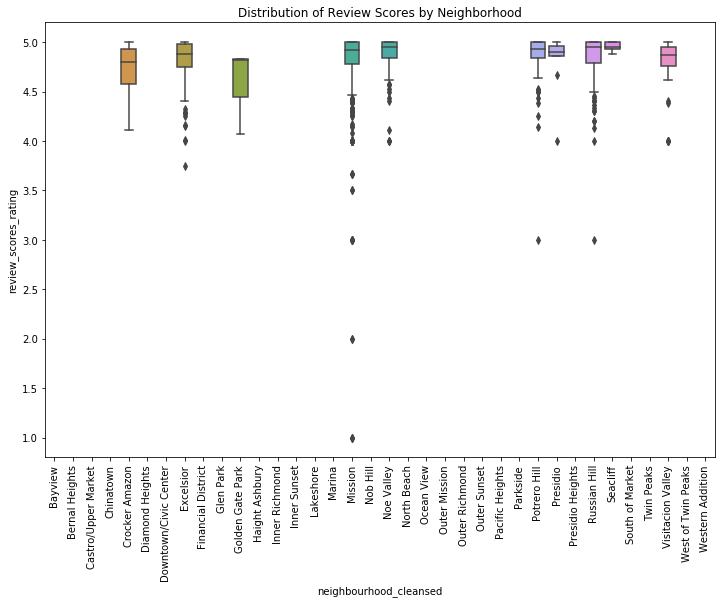

In [20]:
# rating scores box plots by neighborhood

# Subset the data to include only the desired neighborhoods
selected_neighborhoods = ['Noe Valley', 'Excelsior', 'Potrero Hill', 'Mission', 'Russian Hill', 'Golden Gate Park', 'Crocker Amazon', 'Presidio', 'Seacliff', 'Visitacion Valley']
subset_data = SF_Data_clean[SF_Data_clean['neighbourhood_cleansed'].isin(selected_neighborhoods)]

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood_cleansed', y='review_scores_rating', data=subset_data)
plt.title('Distribution of Review Scores by Neighborhood')
plt.xticks(rotation=90)

# Show the plot
plt.show()

### Analysis

#### Q1. Which neighborhoods have the highest rating scores?

In [21]:
#review_scores_rating
rs_rating_by_neighbourhood_cleansed = SF_Data_clean.groupby('neighbourhood_cleansed')['review_scores_rating'].mean()
rs_rating_by_neighbourhood_cleansed

neighbourhood_cleansed
Bayview                  4.797237
Bernal Heights           4.863591
Castro/Upper Market      4.896619
Chinatown                4.722527
Crocker Amazon           4.730952
Diamond Heights          4.890833
Downtown/Civic Center    4.611336
Excelsior                4.803355
Financial District       4.571800
Glen Park                4.901429
Golden Gate Park         4.573333
Haight Ashbury           4.759213
Inner Richmond           4.794689
Inner Sunset             4.828284
Lakeshore                4.822241
Marina                   4.796000
Mission                  4.780812
Nob Hill                 4.647863
Noe Valley               4.887637
North Beach              4.761475
Ocean View               4.807407
Outer Mission            4.753810
Outer Richmond           4.795380
Outer Sunset             4.767747
Pacific Heights          4.782929
Parkside                 4.825108
Potrero Hill             4.875655
Presidio                 4.820000
Presidio Heights         

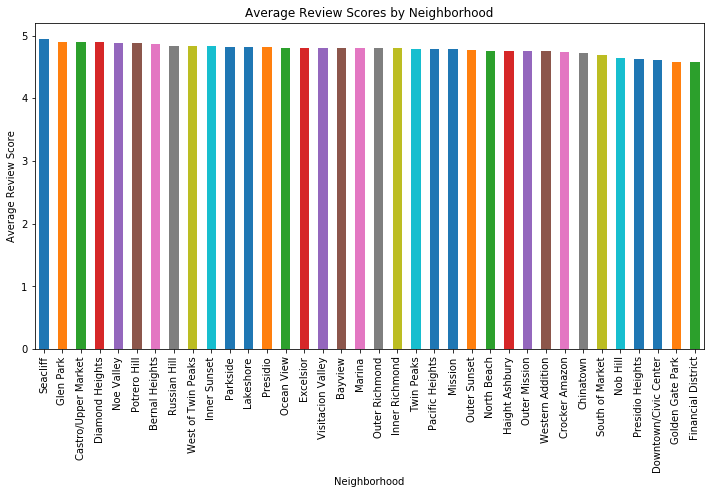

In [22]:
# Plot the average review scores by neighborhood

# Sort the data by average review score in descending order
sorted_data = rs_rating_by_neighbourhood_cleansed.sort_values(ascending=False)

# Plot the sorted data
plt.figure(figsize=(12, 6))
sorted_data.plot(kind='bar')
plt.title('Average Review Scores by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Review Score')
plt.xticks(rotation=90)
plt.show()

> All the neighborhoods in California are high rated as shown in the plot above. 

## 4. Modeling

#### Q3. What factors affect the listings prices in San Francisco?

In [23]:
selected_columns = ['price', 'accommodates', 'beds', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d']
model_df = SF_Data_clean[selected_columns]

In [24]:
# statistics for the variables

model_df.describe()

,price,accommodates,beds,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d
count,8056.000000,8056.000000,7959.000000,8056.000000,8056.000000,8056.000000
mean,392.071003,3.199230,1.782636,47.044315,9.261544,0.570506
std,2182.756993,1.964844,1.164955,98.818437,19.334341,1.450356
min,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,95.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,145.000000,2.000000,1.000000,7.000000,1.000000,0.000000
75%,249.000000,4.000000,2.000000,44.000000,8.000000,0.000000
max,50000.000000,16.000000,12.000000,1134.000000,426.000000,29.000000


In [25]:
model_df = model_df.dropna(subset=['beds'])

In [26]:
# statistics for the variables

model_df.describe()

,price,accommodates,beds,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d
count,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000,7959.000000
mean,381.710014,3.210705,1.782636,47.417263,9.332454,0.576454
std,2048.937843,1.967685,1.164955,99.295509,19.419401,1.457672
min,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,95.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,146.000000,2.000000,1.000000,7.000000,1.000000,0.000000
75%,249.000000,4.000000,2.000000,44.000000,9.000000,0.000000
max,50000.000000,16.000000,12.000000,1134.000000,426.000000,29.000000


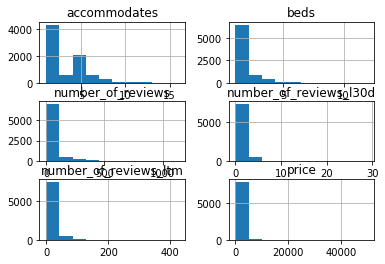

In [27]:
# histograms for the variables 

model_df.hist()
plt.show()

> All the historams above are skewed to the right. 

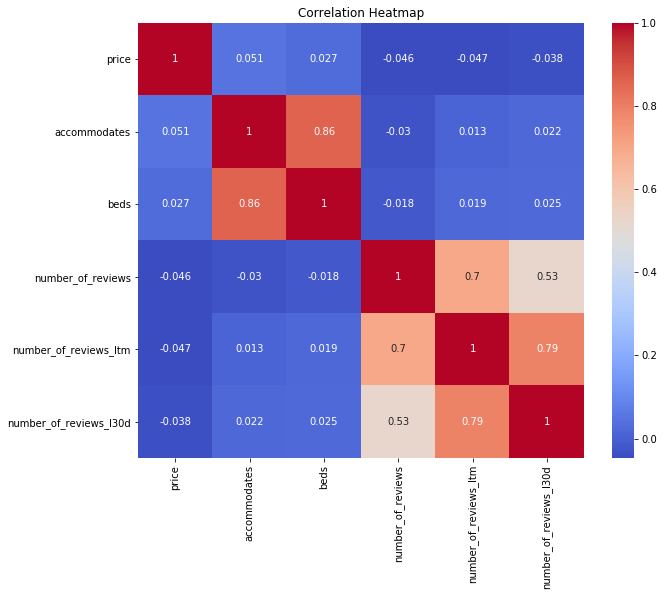

In [28]:
# Calculate the correlation matrix
correlation_matrix = model_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

> The correlation coefficients of price verse other variables are very small thus showing little or no relationships between price.  

In [29]:
# Split the data into features (X) and target variable (y)
X = model_df.drop('price', axis=1)
y = model_df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.00745956174028


## 5. Evaluation

> A model accuracy of 0.00745956174028 indicates that the model is able to explain only a very small portion of the variation in the price variable. The model's predictions are not reliable in capturing the true values of the price variable.


## 6. Deployment

> This accuracy of 0.00745956174028 means that the model explains only about 0.74% of the variance in the price variable. This suggests that the selected features are not strongly correlated with the price.